In [30]:
%matplotlib inline
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import matplotlib.cm as cmx
import matplotlib.colors as colors

In [31]:
bayesian = True

In [32]:
delta_min = 0.02
delta_max = 0.08

if bayesian:
    base_path = 'allen_cahn_results/delta_sigma_n={}.npy'
else:
    base_path = 'allen_cahn_results/delta_fem_n={}.npy'
fem_path = 'allen_cahn_results/delta_fem_n={}.npy'
save = True
trace_n = 40

In [33]:
regex = re.compile(os.path.basename(base_path).format('(\d+)'))
matches = [regex.match(f) for f in os.listdir(os.path.dirname(base_path))]
ns = sorted([int(m.group(1)) for m in matches if m])

In [34]:
def plot_samp(samples, bw, label, **plot_kwargs):
    delta = samples[:,1]
    kde = scipy.stats.gaussian_kde(delta.T, bw_method=0.3)
    range = np.linspace(delta_min, delta_max, 500)
    plt.plot(range, kde(range), label=label, **plot_kwargs)

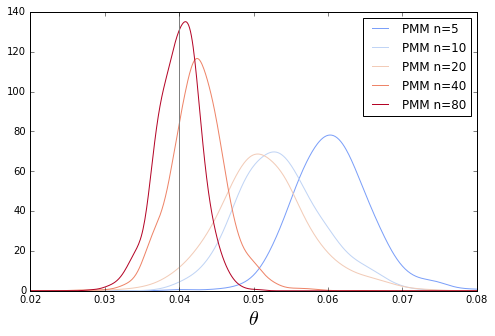

In [35]:
plt.figure(figsize=(8,5))
cm = plt.get_cmap('coolwarm')
cNorm  = colors.Normalize(vmin=0, vmax=1)

scalar_map = cmx.ScalarMappable(norm=cNorm, cmap=cm)
for ix, n in enumerate(ns):
    samples = np.load(base_path.format(n))
    label = 'PMM n={}'.format(n) if bayesian else 'FEM {}x{}'.format(n, n)
    plot_samp(samples, 0.3, label, c=scalar_map.to_rgba((ix+1) * 1./len(ns)))

cm = plt.get_cmap('Greys')
scalar_map = cmx.ScalarMappable(norm=cNorm, cmap=cm)

#plot_samp(fem_samples_25, 0.3, 'FEA - 25x25', c=scalar_map.to_rgba(0.25), linestyle='dashed')
#plot_samp(fem_samples_50, 0.3, 'FEA - 50x50', c=scalar_map.to_rgba(0.75), linestyle='dashed')
plt.axvline(0.04, c='gray')
plt.xlabel('$\\theta$', fontsize=20)
plt.legend()
#plt.gca().get_yaxis().set_visible(False)
out_name = 'ac_posteriors.pdf' if bayesian else 'ac_posteriors_fea.pdf'
if save: plt.savefig('figures/' + out_name, transparent=True, bbox_width=0)

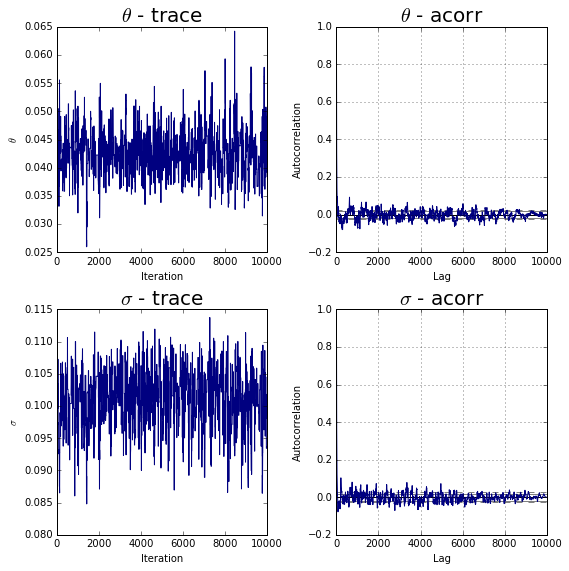

In [36]:
import pandas as pd
from pandas.tools.plotting import autocorrelation_plot
samples = np.load(base_path.format(trace_n))
plt.figure(figsize=(8, 8))
plt.subplot(2,2,1)
plt.plot(samples[:,1], c='navy')
plt.ylabel('$\\theta$')
plt.xlabel('Iteration')
plt.title('$\\theta$ - trace', fontsize=20)
a = plt.subplot(2,2,2)
autocorrelation_plot(samples[:,1], a, c='navy')
plt.title('$\\theta$ - acorr', fontsize=20)
plt.subplot(2,2,3)
plt.plot(samples[:,2], c='navy')
plt.title('$\\sigma$ - trace', fontsize=20)
plt.ylabel('$\\sigma$')
plt.xlabel('Iteration')
a = plt.subplot(2,2,4)
autocorrelation_plot(samples[:,2], a, c='navy')
plt.title('$\\sigma$ - acorr', fontsize=20)
plt.tight_layout()

if save and bayesian: plt.savefig('figures/ac_traces_n={}.pdf'.format(trace_n), transparent=True, bbox_width=0)